In [1]:
import nglview as nv
from script import KEX
from openbabel import openbabel

## Förbereda 2q0s filen

 - Inhibitor tas bort manuellt i pymol
 - Serinet modifieras i openbabel via konvertering via xyz format

In [2]:
def pdb_to_xyz_to_pdb(input_pdb):
    obConversion = openbabel.OBConversion()
    
    # Läs in PDB
    obConversion.SetInAndOutFormats("pdb", "xyz")
    mol = openbabel.OBMol()
    obConversion.ReadFile(mol, input_pdb)
    
    # Skriv till XYZ
    obConversion.WriteFile(mol, "temp.xyz")
    obConversion.CloseOutFile()
    
    # Läs in XYZ
    obConversion = openbabel.OBConversion()
    obConversion.SetInAndOutFormats("xyz", "pdb")
    mol2 = openbabel.OBMol()
    obConversion.ReadFile(mol2, "temp.xyz")
    
    # Skriv till slutlig PDB
    obConversion.WriteFile(mol2, "test.pdb")
    obConversion.CloseOutFile()

In [3]:
pdb_to_xyz_to_pdb("pymol_2q0s_serine.pdb")
#Får inte ut någon ändring av SER

## Ladda in 2q0s

In [4]:
s = KEX("2q0s_full.pdb")

## Skapa liganderna 

In [5]:
s.create_molecule(smiles = "C[C@H](O)c1ccccc1", name = "S_substrate", show_structure= False)
s.create_molecule(smiles = "C[C@@H](O)c1ccccc1", name = "R_substrate", show_structure= False)

Molecule saved as S_substrate.mol
Molecule saved as R_substrate.mol


In [6]:
s.mol_to_pdbqt_new("S_substrate.mol", add_ligand = True)
s.mol_to_pdbqt_new("R_substrate.mol", add_ligand = True)

## Mutera

In [7]:
# s.mutations(subunits = "All", positions = (149, 153), mutations = ("VAL", "VAL"), label = "serine)
# s.mutations(subunits = "All", positions = (153, 173), mutations = ("VAL", "VAL"), label = "serine")

## MD

In [8]:
# Lägg till i detta i klassen, allt kan göras i pdb mappen

## Acetylerat serin

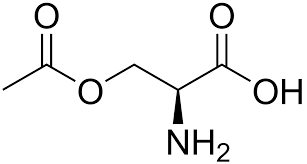

In [9]:
s.create_molecule(smiles = "N[C@@H](COC(=O)C)C(=O)O", name = "acetyl_serine", show_structure= True)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Molecule saved as acetyl_serine.mol


In [10]:
s.mol_to_pdbqt_new("acetyl_serine.mol", add_ligand = False)

## Acetyleringen som ska byggas i pymol

- ATOM     14  C   UNK     1       1.948  -0.352   0.284  0.00  0.00    +0.304 C 
- ATOM     15  O   UNK     1       1.824  -1.101   1.242  0.00  0.00    -0.251 OA
- BRANCH  14  16
- ATOM     16  C   UNK     1       3.181   0.440  -0.025  0.00  0.00    +0.033 C 
- ATOM     17  H   UNK     1       2.950   1.508  -0.003  0.00  0.00    +0.034 HD
- ATOM     18  H   UNK     1       3.944   0.232   0.731  0.00  0.00    +0.034 HD
- ATOM     19  H   UNK     1       3.572   0.150  -1.003  0.00  0.00    +0.034 HD

## Konvertering från pqr till pdbqt

In [11]:
#u = mda.Universe(infile.pqr)
#u.atoms.write(outfile.pdbqt')
# spara alla byggda filer i pdb mappen och lägg in namnen i pdbfilenames listan inför docking

## Docking i smina

In [12]:
#!smina --receptor 2q0s_serin_md.pdbqt --ligand R_prod_cov_final.pdbqt --out Rdocked.pdbqt --custom_scoring custom_scoring_new.txt \
#    --center_x 20.721043365249557 --center_y 54.6562179849733 --center_z 28.330812924930342 --size_x 18 --size_y 18 --size_z 18 \
#    --exhaustiveness 20 --num_modes 9 --log smina_output.log